<a href="https://colab.research.google.com/github/shambhujha74/NETFLIX_MOVIES_AND_TV_SHOWS/blob/main/Shambhu_Jha_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Netflix Movies & TV shows clustering** 



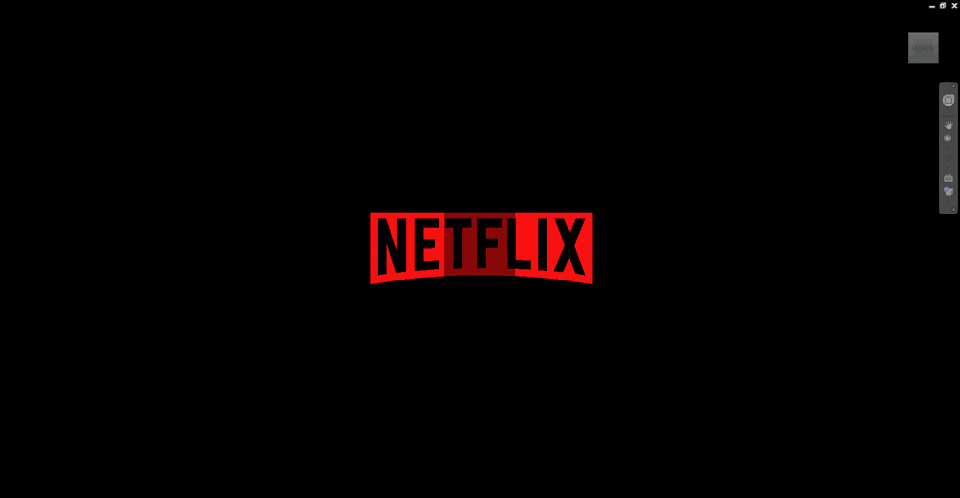

##### **Project Type**    - Unsupervised
##### **Contribution**    -Team
##### **Team Member 1 -** Kaushal Kumar Jha
##### **Team Member 2 -** Shambhu Nath Jha
##### **Team Member 3 -** Nimesh Thakur
##### **Team Member 4 -** Mihir Gupta
##### **Team Member 5-** Asif PA

# **Project Summary -**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

**Steps Involved:**


*   **Importing Libraries:** First of all I have imported all libraies requiered for this project.

*   **Loading the dataset:** In this step i have loaded the dataset and discovered  that our dataset contain 7787 rows and 12 columns. 

*   **Data Set Information:**Here I have checked the information of dataset and discovered that some of variable of dataset contains null values,duplicate value is not present in dataset and dtype of all variables are object except released year.


*   **Data Wrangling:**In this step,I have changed the date_added column dtype to datetime format and we have extracted year and month from that and made two seperate columns.Also made two seperate dataframe for movies and tvshows and Changed the duration of movies and tvshows dataframe into string.

*   **EDA on features:**In this step i have performed analysis on dataset starting from Univariate than Bivariate and after that Multivariate Analysis.
*   **Hypothesis Testing:**Here we have perfomred some hypothesis testing on our dataset.


*  **Feature Engineering & Data Pre-processing:**In this step i have performed null value treatment and as a part of feature engineering we have done textual data processing which includes:expand contraction, lower casing, removing punctuations and stopwords, normalization,and vectoriztion. We performed data scaling using standardscalar, and dimensionality reduction using PCA.
  
*  **Model Implementation:**In this step we perform clustering using different algorithms, we tried K-Means, ElbowCurve, DBSCAN, Dendogram, Agglomerative Clustering.


*   **Recommendation System:**Lastly we have made content based recommendation sysytem.

# **GitHub Link -**

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset. Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
!pip install mapclassify
!pip install geopandas
# Import Libraries
import geopandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.cm as cm
import math
from scipy.stats import *


import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.cm as cm

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA


from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch


import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
df=pd.read_csv("/content/drive/MyDrive/ALMABETTER/ML Unsupervised project/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f'Numbers of rows in data set are: {df.shape[0]}')
print(f'Numbers of columns in data set are: {df.shape[1]}')

Numbers of rows in data set are: 7787
Numbers of columns in data set are: 12


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

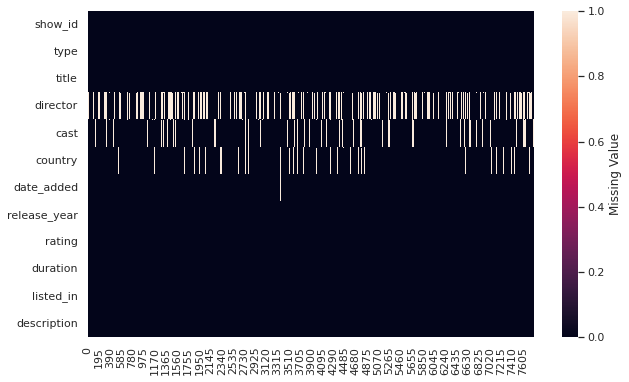

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),cbar_kws={'label': 'Missing Value'})
plt.show()

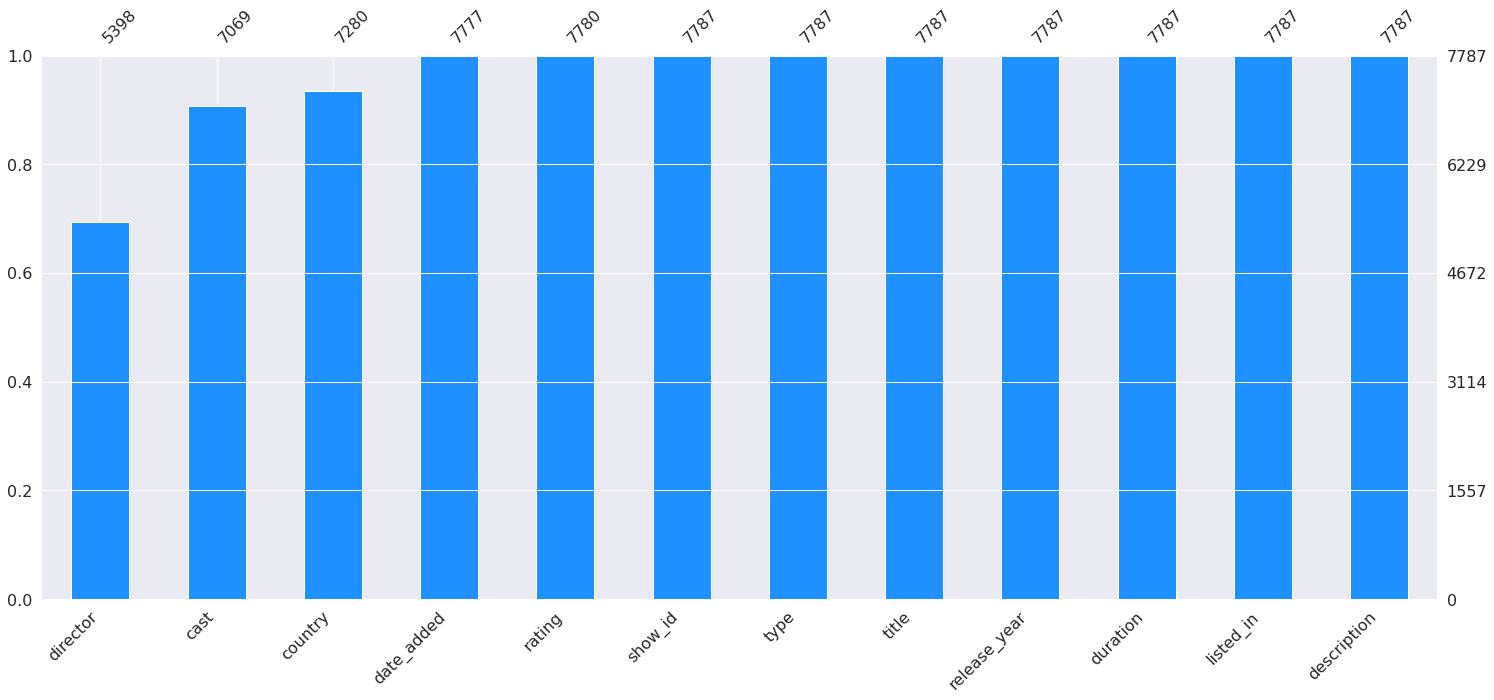

In [ ]:
msno.bar(df,color="dodgerblue",sort="ascending")
plt.show()

### What did you know about your dataset?

*   Our dataset contain 7787 rows and 12 columns.
*   Datatype of all variables is object except release_year which is int64.


*   There is no duplicates in dataset
*   Maximum number of null values present in director column followed by cast.





## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,7787.0,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0


### Variables Description 


*   show_id:Unique ID for every Movie / Tv Show

*   type : Identifier - A Movie or TV Show

*   title : Title of the Movie / Tv Show

*   director : Director of the Movie

*   cast : Actors involved in the movie / show
*   country : Country where the movie / show was produced


*   date_added : Date it was added on Netflix


*   release_year : Actual Releaseyear of the movie / show


*   rating : TV Rating of the movie / show


*   duration : Total Duration - in minutes or number of seasons


*   listed_in : Genere
*   description: The Summary description






### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
#Changing date_added to date time format
df["date_added"] = pd.to_datetime(df['date_added'])
#Extracting Year
df['year_added'] = df['date_added'].dt.year
#Extracting Month
df['month_added'] = df['date_added'].dt.month
#Extracting Day
df['day_added'] = df['date_added'].dt.day

In [ ]:
#Seperating TV Show And Movie
netflix_tvshows=df[df['type']=='TV Show']
netflix_movies=df[df['type']=='Movie']

In [ ]:
print(f'shape of netflix_tvshows: {netflix_tvshows.shape}')
print(f'shape of netflix_movies: {netflix_movies.shape}')

shape of netflix_tvshows: (2410, 15)
shape of netflix_movies: (5377, 15)


In [ ]:
#Changing the duration format for movies
netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)
netflix_movies['duration']

1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration, Length: 5377, dtype: int64

In [ ]:
#Changing duration of tvshows to interger
netflix_tvshows['duration']=netflix_tvshows['duration'].str.replace(' Season','')
netflix_tvshows['duration']=netflix_tvshows['duration'].str.replace(' Seasons','')
netflix_tvshows['duration']=netflix_tvshows['duration'].str.replace('s','')
netflix_tvshows['duration']=netflix_tvshows['duration'].astype(str).astype(int)
netflix_tvshows['duration']

0       4
5       1
11      1
12      1
16      1
       ..
7767    1
7775    1
7777    2
7779    1
7785    1
Name: duration, Length: 2410, dtype: int64

### What all manipulations have you done and insights you found?


*   I have changed the date_added column dtype to datetime format and we have extracted year and month from that and made two seperate columns.
*   Made two seperate dataframe for movies and tvshows.

*   Changed the duration of movies and tvshows dataframe into string.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

###**Univariate Analysis**

#### Chart - 1 **Visualisaztion of most watch type**

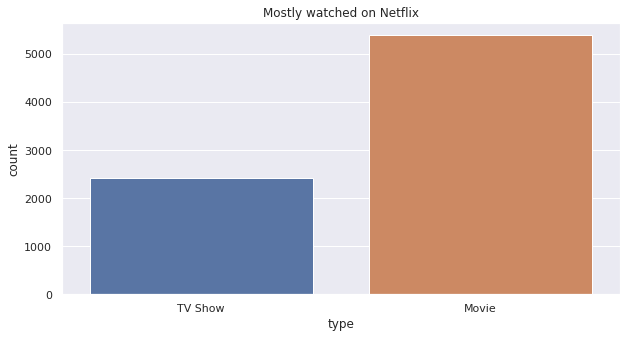

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(10,5))
sns.countplot(x='type',data=df)
plt.title('Mostly watched on Netflix')
plt.show()

In [ ]:
#Ploting Donut chart for better visualisation
# Create data for the chart
labels = df.type.value_counts().sort_index().index
values = df.type.value_counts().sort_index().values
# Create the donut chart
fig = px.pie(values=values, names=labels,height=500, width=600, hole=.5,title='Mostly watched on Netflix')
fig.update_traces(hovertemplate=None, textposition='outside',
textinfo='percent+label', rotation=90)
# Display the chart
fig.show()


##### 1. Why did you pick the specific chart?

I have used two plot:

1)Countplot- Show the counts of observations in each categorical bin using bars. 

2)Donut Chart-A donut chart is almost identical to a pie chart, but the center is cut out (hence the name ‘donut’). Donut charts are also used to show proportions of categories that make up the whole, but the center can also be used to display data. 

##### 2. What is/are the insight(s) found from the chart?

Movies are getting watched mostly than TV shows.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We can see that TV shows are less than movies so Netflix should release more contents of tv shows also to retain its viewer.

#### Chart - 2 ***Visualisation of Top 10 Directors***

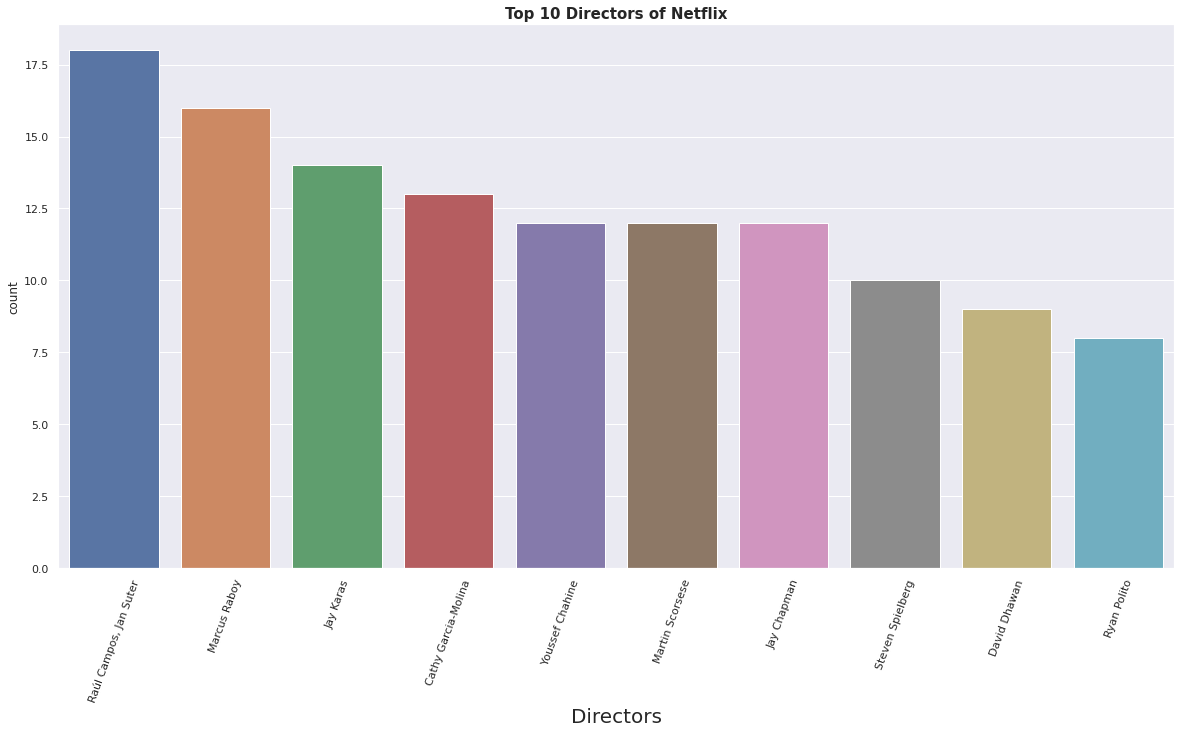

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(20,10))
graph=sns.countplot(x='director',data=df,order=df.director.value_counts().head(10).index)
plt.xticks(rotation = 70)
graph.set_title("Top 10 Directors of Netflix",fontsize=15,fontweight='bold')
plt.xlabel('Directors',size=20)
plt.show()

##### 1. Why did you pick the specific chart?

Countplotplot show the counts of observations in each categorical bin using bars.

##### 2. What is/are the insight(s) found from the chart?

Raul Campos, jan suter is most famous director among all.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

If movie/Tvshows will be directed by Top directors than movies/TVshows will earn more revenue due to fanbase of directors.

#### Chart - 3 Top 10 Actors

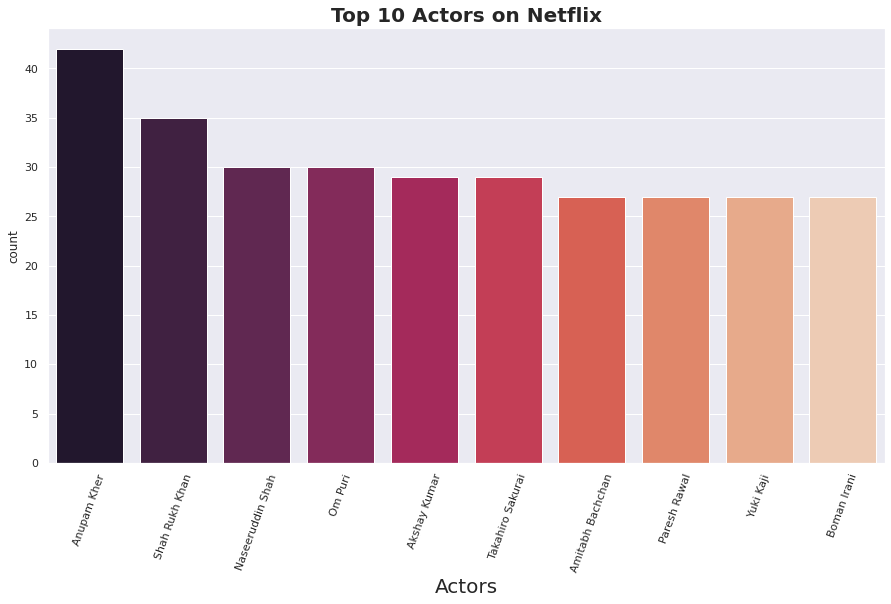

In [ ]:
# Chart - 3 visualization code
actor = df[df.cast != ' '].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(15,8))
sns.countplot(x= actor, order=actor.value_counts().index[:10], palette='rocket')
plt.xticks(rotation = 70)
plt.xlabel("Actors",size=20)
plt.title('Top 10 Actors on Netflix',fontsize=20,fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

We have used count plot to count the observations in variables and displayed it using bar.

##### 2. What is/are the insight(s) found from the chart?

We can see the most preferable actor by Netflix is Anupan Kher followed by Shah Rukh khan. 

We have used count plot to count the observations in variables and displayed it using bar.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Casting famous actors in movies/Tvshows will help in earning more revenue.

#### Chart - 4 **Visualisation of Content Released in  Month**

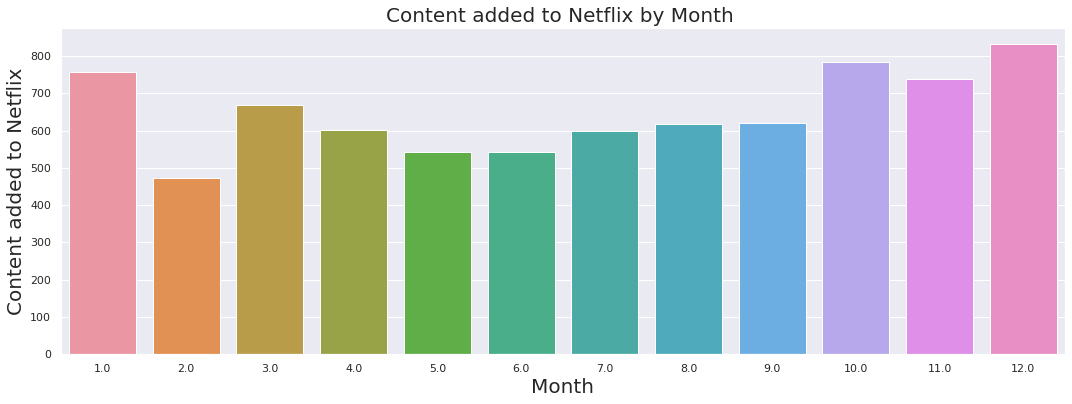

In [ ]:
# Chart - 4 visualization code
#Visualising in which month maximum content was released
fig = plt.figure(figsize=(18,6))
sns.countplot(data=df,x = 'month_added')
plt.title('Content added to Netflix by Month ', fontsize=20)
plt.ylabel('Content added to Netflix', fontsize=20)
plt.xlabel('Month', fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

We have used count plot to count the observations in variables and displayed it using bar.

##### 2. What is/are the insight(s) found from the chart?

We can see that most of the content was released in month of October,November,December and January.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Very less contents are released in mid of year so it can be filled by releasing more contents which will increase viewer on Netflix.

#### Chart - 5 ***Visualisation of Yearly content Released on Netflix***

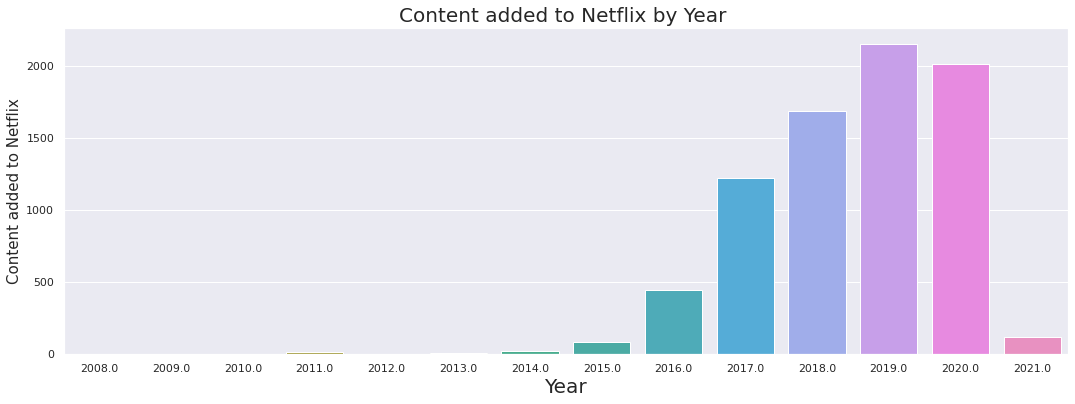

In [ ]:
# Chart - 5 visualization code
fig = plt.figure(figsize=(18,6))
sns.countplot(data=df,x = 'year_added')
plt.title('Content added to Netflix by Year ', fontsize=20)
plt.ylabel('Content added to Netflix', fontsize=15)
plt.xlabel('Year', fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

Multiple bar charts are extremely useful if you want to present a large amount of information in a small amount of space.

##### 2. What is/are the insight(s) found from the chart?

We can see that content released on netflix was continuously increasing till 2019 after it started decreasing and there was sudden downfall in 2021 due to covid.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We can see that there is increasing trend of released source on netflix till 2020 and there after sudden downfall in 2021 this could be due to the impact of lockdown.

###Chart-5 **Top 10 Genres of Netflix**

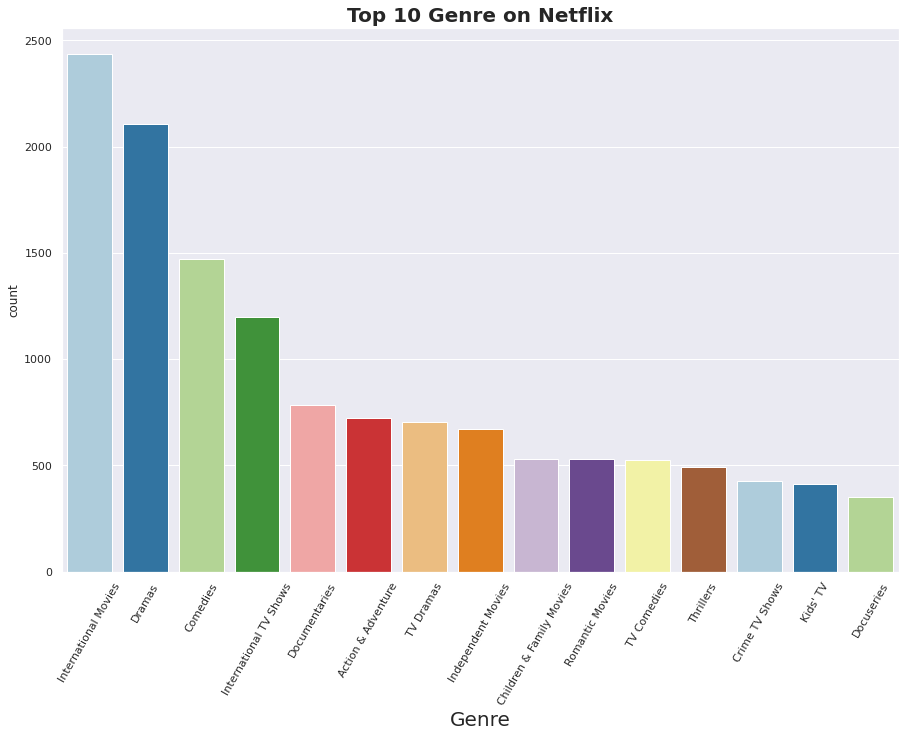

In [ ]:
# Chart - 5 visualization code
# Making relevant dataframe for our observation
genre = df[df.listed_in != ' '].set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# setting parameters and plotting bar graph
sns.set(rc={'figure.figsize':(15,10)})
sns.countplot(x= genre, order=genre.value_counts().index[:15], palette='Paired')
plt.xticks(rotation = 60)
plt.xlabel("Genre",size=20)
plt.title('Top 10 Genre on Netflix',fontsize=20,fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

We have used count plot to count the observations in variables and displayed it using bar.

##### 2. What is/are the insight(s) found from the chart?

Most of the contents on netflix is covered by International Movies and Dramas.

#### Chart - 6 ***Rating***

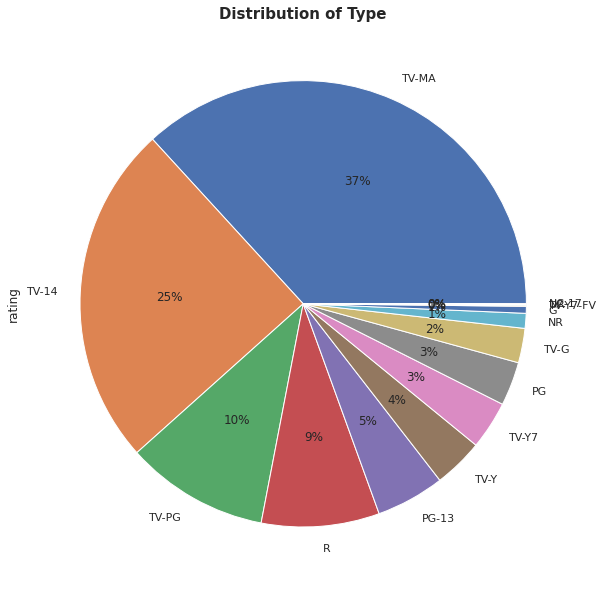

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(10,35))
df.rating.value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.title('Distribution of Type', fontsize=15,fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart helps organize and show data as a percentage of a whole.

##### 2. What is/are the insight(s) found from the chart?

We can see that most of the content released on netflix is TV-MA(Mature Audience)rated followed by TV-14(Not Suitable for age under14).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Mostly content on Netflix is TV-MA(Mature Audience) rated,they should add content for other ratings also for rest of the audience. 

#### Chart - 7 **Duration of Movies**

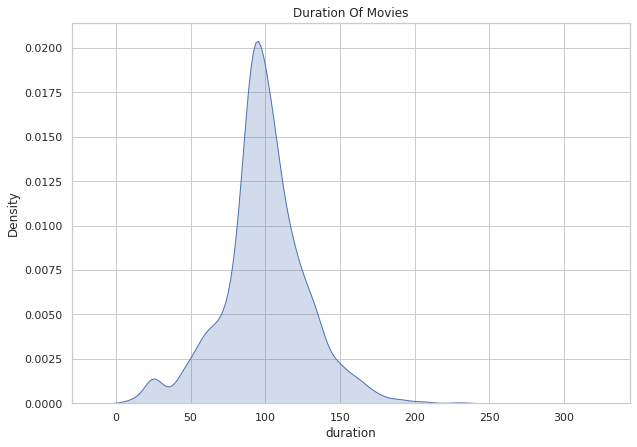

In [ ]:
# Chart - 7 visualization code
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.kdeplot(data=netflix_movies['duration'], shade=True)
plt.title('Duration Of Movies')
plt.show()

##### 1. Why did you pick the specific chart?

I have used kde(kernel density estimate)plot, it is used to visualize the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

##### 2. What is/are the insight(s) found from the chart?

We can see that duration of most of the movies is approx 90 minutes.

#### Chart - 8 ***Duration of Tv shows***

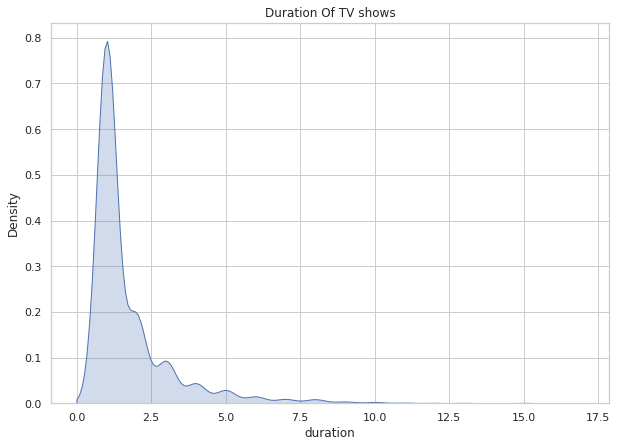

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(10,7))
sns.kdeplot(data=netflix_tvshows['duration'], shade=True)
plt.title('Duration Of TV shows')
plt.show()

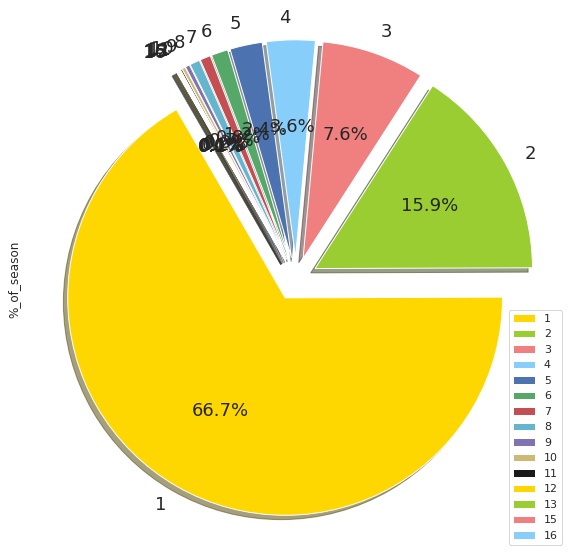

In [ ]:
relevant_df = netflix_tvshows[['type','duration']].copy()
length = len(relevant_df)

relevant_df = relevant_df.groupby('duration').agg(['count'])
relevant_df= relevant_df.droplevel(0,axis=1)

relevant_df.reset_index(inplace = True)
relevant_df['%_of_season'] = ((relevant_df['count']/length)*100)
relevant_df.columns
relevant_df.set_index('duration',inplace = True)
relevant_df.drop('count',axis =1,inplace = True)

# Specifying labels, colours and executing pie chart
labels = ['0 - 40','41 - 50','51 - 60','61 - 70']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','b','g','r','c','m','y','k']
explode = (0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1)
relevant_df.plot.pie(figsize = (15,10),fontsize = 18,explode=explode, colors=colors,autopct='%1.1f%%', shadow=True,startangle=120,subplots = True)
plt.show()

##### 1. Why did you pick the specific chart?

I have used kde(kernel density estimate), it is used to visualize the distribution of observations in a dataset, analogous to a histogram.

A pie chart helps organize and show data as a percentage of a whole.

##### 2. What is/are the insight(s) found from the chart?

Most of the tv shows are 1 season long which is 66.7% of complete Tvshows.

#### Chart - 9 ***Word Analysis in Titles***

In [ ]:
#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

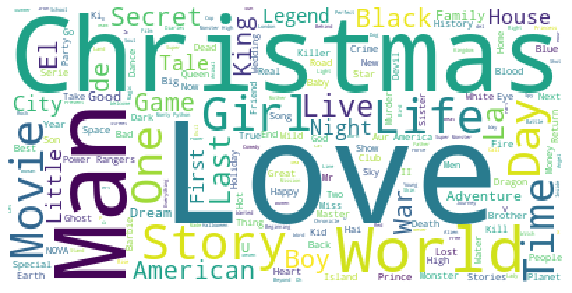

In [ ]:
# Chart - 9 visualization code
#Visualising most of the word used in Title using word cloud
#Creating the dataframe for word cloud
plt.figure(figsize=(10,7))
df_wc=df['title']
text=" ".join(i for i in df_wc)
#create stopword list
stopwords=set(STOPWORDS)
#generate a word cloud image
wordcloud=WordCloud(stopwords=stopwords, background_color='white').generate(text)
#Display the generated images
plt.imshow(wordcloud,interpolation='nearest')
plt.axis('off')
plt.show()


##### 1. Why did you pick the specific chart?

 A word cloud (also known as a tag cloud or text cloud) is a visual representation of a text, in which the words appear bigger the more often they are mentioned. Word clouds are great for visualizing unstructured text data and getting insights on trends and patterns.

##### 2. What is/are the insight(s) found from the chart?

It seems like Christmas,Love','Man','World','Story','Life' is mostly used words in titles.

### **Bivariate Analysis**

#### Chart - 10 ***Country vs Content***

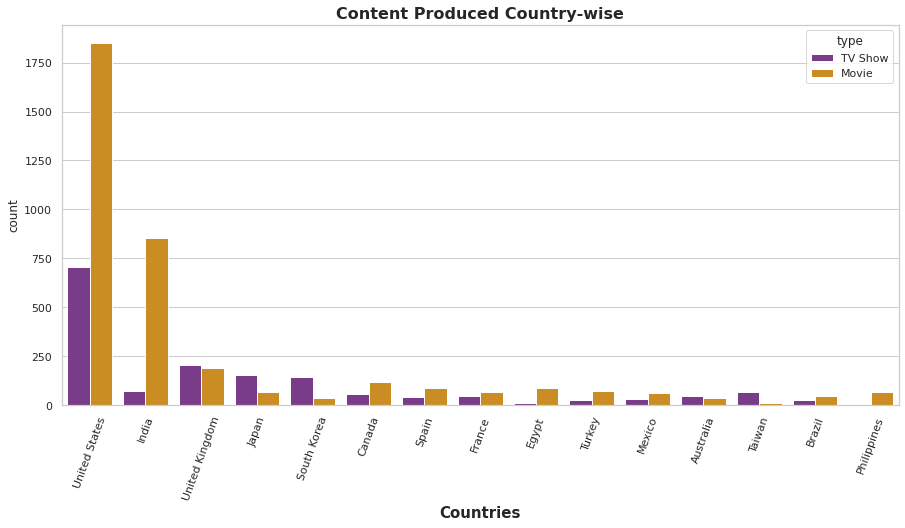

In [ ]:
# Chart - 10 visualization code
#Ploting top 15 Countries vs Content
plt.figure(figsize=(15,7))
sns.countplot(x='country',hue='type',data=df,palette="CMRmap", order=df['country'].value_counts().index[0:15])
plt.title('Content Produced Country-wise',size='16',fontweight="bold")
plt.xlabel('Countries',fontsize=15,fontweight="bold")
plt.xticks(rotation = 70)
plt.show()
     


##### 1. Why did you pick the specific chart?

Multiple bar charts are extremely useful if you want to present a large amount of information in a small amount of space. 

##### 2. What is/are the insight(s) found from the chart?

United States having highest number of content on Netflix compare to other Countries.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We can see that very less content is available on Netflix for Countries other than United States so Netflix should release more content for such Country also to increase its market value.

#### Chart - 11 ***Type Vs Rating***

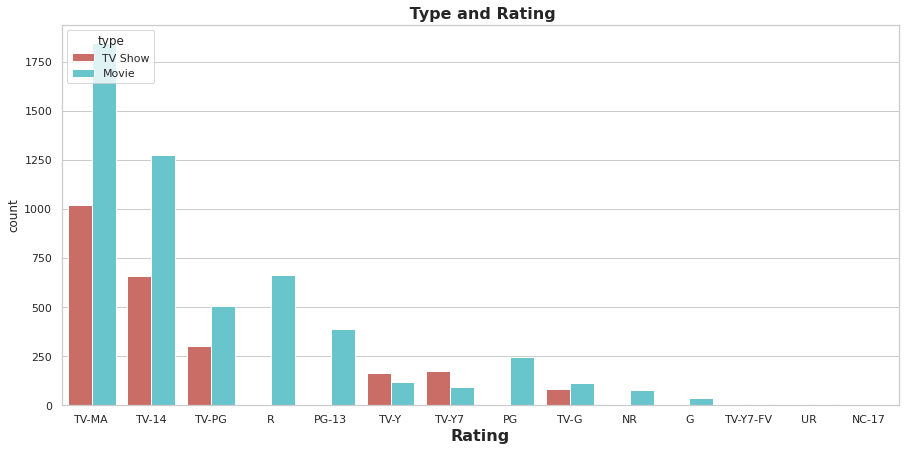

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(15,7))
sns.countplot(x='rating',hue='type',data=df,palette="hls", order=df['rating'].value_counts().index[0:15])
plt.title(' Type and Rating',size='16',fontweight="bold")
plt.xlabel('Rating',size='16',fontweight="bold")
plt.show()

##### 1. Why did you pick the specific chart?

Multiple bar charts are extremely useful if you want to present a large amount of information in a small amount of space.

##### 2. What is/are the insight(s) found from the chart?

We can see that most of the Movie and Tv shows are TV-MA(Mature Audience) rated.

#### Chart - 12

In [ ]:
# Chart - 12 visualization code
# making relevant dataframe for our observation
country = df[df.country != ' '].set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
country = pd.DataFrame(country.value_counts().reset_index().rename(columns = {'index' : 'name',
                                                                              0 : 'count'}))

# renaming the countries according to realtime stats as available on geopandas
country.replace({'name' : {'West Germany' : 'Germany',
                        'East Germany' : 'Germany',
                        'Soviet Union' : 'Russia',
                        'United States,' : 'United States of America',
                        'United States' : 'United States of America',
                        'United Kingdom,' : 'United Kingdom',
                        'Cambodia,' : 'Cambodia',
                        'Poland,': 'Poland',
                        'Czech Republic' : 'Czechia',
                        'Vatican City' : 'Italy',
                        'Hong Kong' : 'China',
                        'Singapore' : 'Malaysia',
                        'Liechtenstein' : 'Germany',
                        'Cayman Islands' : 'United Kingdom',
                        'Bermuda' : 'United Kingdom'}}, inplace = True)
# let's have a look at our data frame
country

,name,count
0,United States of America,3296
1,India,990
2,United Kingdom,722
3,Canada,412
4,France,349
...,...,...
116,Dominican Republic,1
117,Samoa,1
118,Azerbaijan,1
119,United Kingdom,1


In [ ]:
# getting the world map
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# merging our data with world map
merge = pd.merge(world,country,how = 'left', left_on = 'name', right_on = 'name')
merge

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,count
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",412.0
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",3296.0
...,...,...,...,...,...,...,...
185,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",7.0
186,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",1.0
187,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN
188,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN


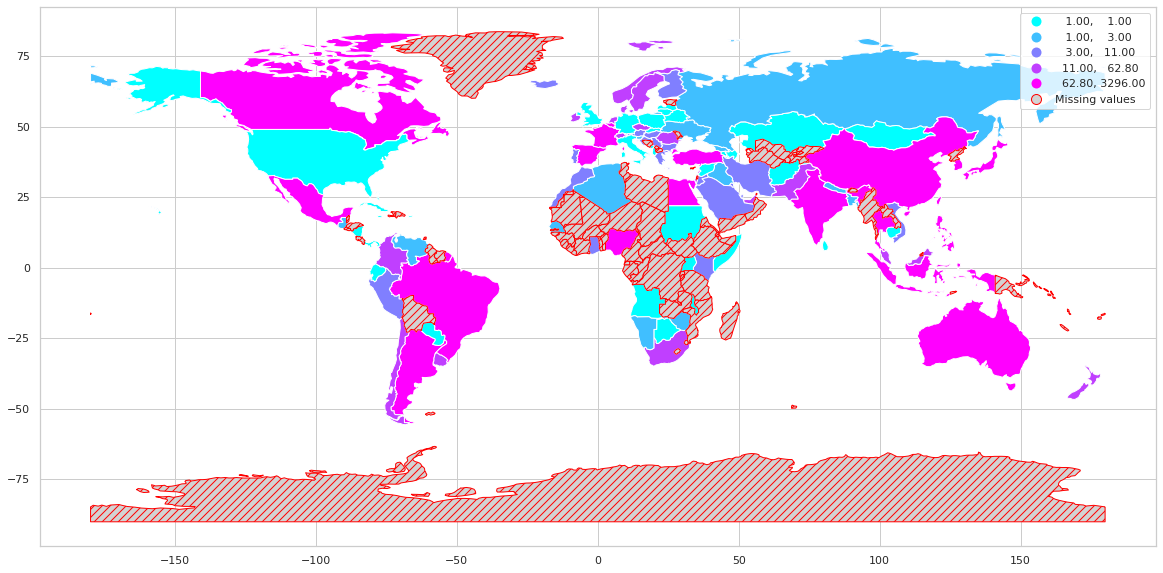

In [ ]:
# Plotting our data into the world map
merge.plot(
    column="count",
    legend=True,
    scheme="quantiles",
    cmap='cool',
    figsize=(20,20),
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values"})
plt.show()


##### 1. Why did you pick the specific chart?

World map is used to show from which region most of the content was released.

##### 2. What is/are the insight(s) found from the chart?

We dont have any content from Antartica and most of the regions of Africa

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The above map shows that most of the content is coming from USA,India,China and some part of South America.

#### Chart - 14 - Correlation Heatmap

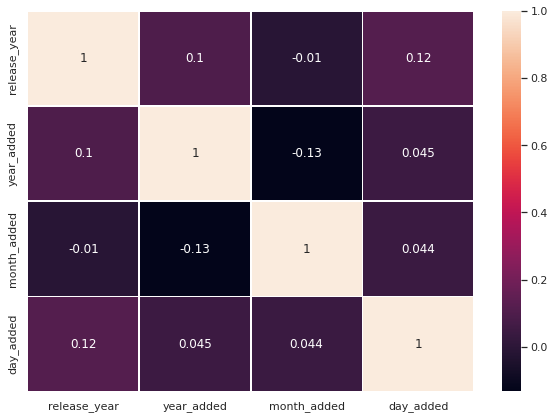

In [ ]:
# Correlation Heatmap visualization code
plt.figure (figsize= (10,7))
sns.heatmap(df.corr(),linewidths=.5,annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables.

##### 2. What is/are the insight(s) found from the chart?

We can see that the numeric columns are not much correlated to each other.
In our dataset most of the variables was characterbased so heatmap is only showing relationship for numeric columns.These three numeric columns shows date,so there is not much correlation between them.

#### Chart - 15 - Pair Plot 

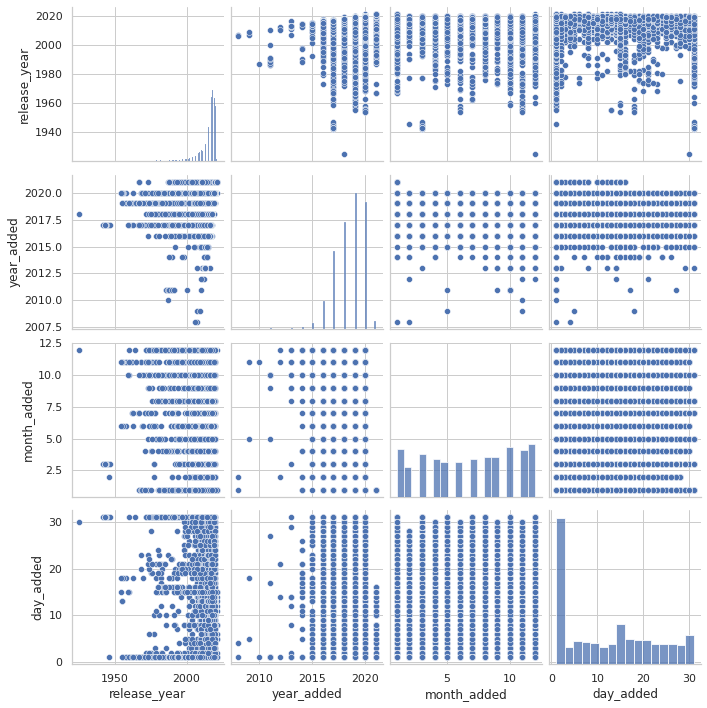

In [ ]:
# Pair Plot visualization code
sns.pairplot(data=df)
plt.show()

##### 1. Why did you pick the specific chart?

 Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

In [ ]:
#helper functions 
class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

In [ ]:
#calculating variance
variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
#creating instance of the class
findz = findz()
#creating a function 
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"


In [ ]:
zcdf = lambda x: norm(0,1).cdf(x)
def p_value(z,tailed):
  z=zcdf(z)
  if tailed=='l':
    return z
  elif tailed == 'r':
    return 1-z
  elif tailed == 'd':
    if z>0.5:
      return 2*(1-z)
    else:
      return 2*z
  else:
    return np.nan

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis - Atleast 25 percent of shows(movies & TV shows included) consist of International genre

Alternate Hypothesis - Less than 25 percent of shows(movies & TV shows included) consist of International genre

#### 2. Perform an appropriate statistical test.

In [ ]:
# Making relevant dataframe for our hypothesis test
relevant_df = genre.copy()
relevant_df = relevant_df.sample(1000,random_state=42)
relevant_df = relevant_df.reset_index()
relevant_df.rename(columns = {0 : 'type'}, inplace = True)
count = relevant_df[relevant_df['type'] == 'International TV Shows'].count()
count = count + relevant_df[relevant_df['type'] == 'International Movies'].count()
count

title    207
type     207
dtype: int64

In [ ]:
# Perform Statistical Test to obtain P-Value
val = 207
p_hyp = 0.25
size = 1000
p_sample = val/size

z = findz.proportion(p_sample,p_hyp,size)
p = p_value(z,'l') #left tailed
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 0.0008439436732277457


##### Which statistical test have you done to obtain P-Value?

We have used Z score to obtain P-value.

##### Why did you choose the specific statistical test?

We were dealing with ratios so Z-score is only relevant statistical test for the same.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis - Atmost 20 percent of the shows in netflix are rated as TV-MA

Alternate Hypothesis - More than 20 percent of the shows in netflix are rated as TV-MA

#### 2. Perform an appropriate statistical test.

In [ ]:
relevant_df = df['rating'].copy()
relevant_df = relevant_df.sample(1000,random_state = 0)
relevant_df = relevant_df.reset_index()
relevant_df.drop(columns = 'index', inplace = True)
count = relevant_df[relevant_df['rating'] == 'TV-MA'].count()
count

rating    367
dtype: int64

In [ ]:
# Perform Statistical Test to obtain P-Value
val = 367
p_hyp = 0.30
size = 1000
p_sample = val/size

z = findz.proportion(p_sample,p_hyp,size)
p = p_value(z,'r') #right tailed
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 1.8871465897740691e-06


##### Which statistical test have you done to obtain P-Value?

We have used Z score to obtain P-value.

##### Why did you choose the specific statistical test?

We were dealing with ratios so Z-score is only relevant statistical test for the same.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
#Checking Null Values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
year_added        10
month_added       10
day_added         10
dtype: int64

In [ ]:
# Handling Missing Values & Missing Value Imputation
df['director'].fillna('unknown', inplace=True)
df['cast'].fillna('unknown', inplace=True)
df['country'].fillna(value=df['country'].mode()[0],inplace=True)
df.dropna(subset=['date_added','day_added','year_added','month_added','rating'],inplace=True)

In [ ]:
#Cross-Checking Null values after treatment
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
day_added       0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

*   I have filled the null value in director and cast columns with 'Unknown',because we dont know which movie was directed and casted by whom .

*   Null value of Country column has been filled by mode so that the country having most content on Netflix will come in place of Null value.

*   I have dropped null values of date_added, year_added,month_added,day_added and rating columns because they contain very few number of null values. 



### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

We will be clustering using  Director,Cast,Country,Listed in (genres),Description,Rating attributes.







In [ ]:
#Creating Copy of original dataset too keep original one safe
df1=df.copy()

In [ ]:
# Expand Contraction
#Combing all important attributes in one column
df1['clustering_attributes'] = (df1['director'] + ' ' + 
                                df1['cast'] +' ' + 
                                df1['country'] +' ' + 
                                df1['listed_in'] +' ' + 
                                df1['description']+' '+df1['rating'])

In [ ]:
df1['clustering_attributes'][20]

'Onir Geetanjali Thapa, Zain Khan Durrani, Shray Rai Tiwari, Mona Ambegaonkar, Chandreyee Ghosh, Barun Chanda, Saheb Bhattacharjee, Shefali Chauhan India Dramas, Independent Movies, International Movies After accidentally connecting over the Internet, two strangers form a tight friendship – not knowing they already share a bond. TV-14'

#### 2. Lower Casing

In [ ]:
# Lower Casing
df1['clustering_attributes']=df1['clustering_attributes'].str.lower()

In [ ]:
#Cheking the clustering attibutes column after lower casing
df1['clustering_attributes'][20]

'onir geetanjali thapa, zain khan durrani, shray rai tiwari, mona ambegaonkar, chandreyee ghosh, barun chanda, saheb bhattacharjee, shefali chauhan india dramas, independent movies, international movies after accidentally connecting over the internet, two strangers form a tight friendship – not knowing they already share a bond. tv-14'

We can see that we have succefully lowered the case of clustering attributes.

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
# Remove punctuation from the text :

def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string 
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
    
df1['clustering_attributes'] = df1['clustering_attributes'].apply(remove_punctuation)
df1['clustering_attributes'][20]

'onir geetanjali thapa zain khan durrani shray rai tiwari mona ambegaonkar chandreyee ghosh barun chanda saheb bhattacharjee shefali chauhan india dramas independent movies international movies after accidentally connecting over the internet two strangers form a tight friendship – not knowing they already share a bond tv14'

**We can see that punctuations have been removed successfully.**

#### 4. Removing Stopwords & Removing White spaces

In [ ]:
# extracting the stopwords from nltk library
import nltk
from nltk.corpus import stopwords
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
# Remove Stopwords
# function to remove stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)
df1['clustering_attributes'] = df1['clustering_attributes'].apply(stopwords)

In [ ]:
#Checking Stop words removed or not
df1['clustering_attributes'][20]

'onir geetanjali thapa zain khan durrani shray rai tiwari mona ambegaonkar chandreyee ghosh barun chanda saheb bhattacharjee shefali chauhan india dramas independent movies international movies accidentally connecting internet two strangers form tight friendship – knowing already share bond tv14'

**We have successfuly removed all stop words.**

#### 5. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# create an object of stemming function :
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)
df1['clustering_attributes'] = df1['clustering_attributes'].apply(stemming)

In [ ]:
df1['clustering_attributes'][20]

'onir geetanjali thapa zain khan durrani shray rai tiwari mona ambegaonkar chandreye ghosh barun chanda saheb bhattacharje shefali chauhan india drama independ movi intern movi accident connect internet two stranger form tight friendship – know alreadi share bond tv14'

In [ ]:
df1['Length(listed_in)'] =df1['listed_in'].apply(lambda x: len(x))
df1['Length(description)'] =df1['description'].apply(lambda x: len(x))
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,clustering_attributes,Length(listed_in),Length(description)
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,8.0,14.0,unknown joão miguel bianca comparato michel go...,54,136
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,12.0,23.0,jorg michel grau demián bichir héctor bonilla ...,28,148
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,12.0,20.0,gilbert chan tedd chan stella chung henley hii...,35,149
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,11.0,16.0,shane acker elijah wood john c reilli jennif c...,56,145
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,1.0,1.0,robert luket jim sturgess kevin spacey kate bo...,6,143


##### Which text normalization technique have you used and why?

We have used stemming for normalization of text. As Stemming removes last few characters from a word, often leading to incorrect meanings and spelling.

Stemming operation bundles together words of same root. e.g. stem operation bundles "response" and "respond" into a common "respon"

#### 6. Text Vectorization

In [ ]:
# Vectorizing Text
tfidf = TfidfVectorizer(stop_words='english')

#get the tf-idf scores
#create TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df1['description'])

#shape of tfidf_matrix
tfidf_matrix.shape



(7770, 17888)

##### Which text vectorization technique have you used and why?

We have used TF-IDF vectorization method,TF-IDF will transform the text into meaningful representation of integers or numbers which is used to fit machine learning algorithm for predictions.

We use TF-IDF because TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.

### 6. Data Scaling

In [ ]:
# Scaling your data
X_features =df1[['Length(description)','Length(listed_in)']]
stdscaler = preprocessing.StandardScaler()
print(X_features.describe())
X=stdscaler.fit_transform(X_features) #Rescaled X
silhouette_score_ = [  ]
range_n_clusters = [i for i in range(2,16)]
#Finding Silhouette Score
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    silhouette_score_.append([int(n_clusters) , round(score , 2)])
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))
     



       Length(description)  Length(listed_in)
count          7770.000000        7770.000000
mean            143.101287          33.372458
std              10.618177          15.018409
min              61.000000           6.000000
25%             140.000000          23.000000
50%             146.000000          34.000000
75%             149.000000          47.000000
max             248.000000          79.000000
For n_clusters = 2, silhouette score is 0.3941905094189749
For n_clusters = 3, silhouette score is 0.43498587872384165
For n_clusters = 4, silhouette score is 0.44761470302252365
For n_clusters = 5, silhouette score is 0.4177506529965405
For n_clusters = 6, silhouette score is 0.4277360676860168
For n_clusters = 7, silhouette score is 0.43178905879748486
For n_clusters = 8, silhouette score is 0.4257032617034128
For n_clusters = 9, silhouette score is 0.3933841559040739
For n_clusters = 10, silhouette score is 0.39800995005900963
For n_clusters = 11, silhouette score is 0.3976903

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Importance of Dimesionality Reduction:


*   Reduce the complexity of the data

*   Improve model performance

*   Fewer features require less computation time

*   Data will be easy to visualise and interpret 
*   Noise reduction,etc.



In [ ]:
# DImensionality Reduction (If needed)
pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

Text(0, 0.5, 'cumulative explained variance')

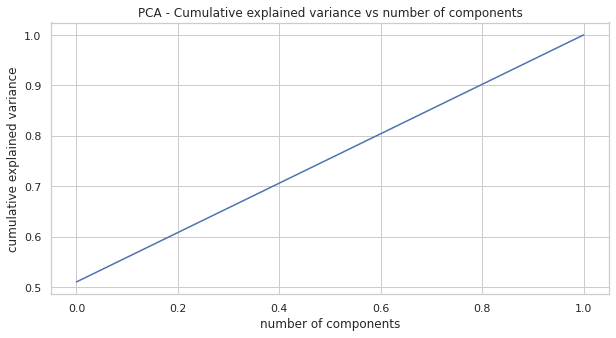

In [ ]:
#Variance vs number of componets
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
# Reducing the dimensions using pca
pca = PCA(n_components=2,random_state=42)
pca.fit(X)
x_pca = pca.transform(X)
x_pca.shape

(7770, 2)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We have used Principal Component Analysis(PCA),PCA is a technique used to reduce the dimensionality of a dataset while retaining as much information as possible. It is often used to simplify data visualization and to identify patterns or relationships in the data

## ***7. ML Model Implementation***

### ML Model - 1 ***K-Means***

In [ ]:
# ML Model - 1 Implementation
k_clusters = 4
# Fit the Algorithm
k_means = KMeans(n_clusters=k_clusters, init='k-means++', n_init=10, max_iter=600, tol=0.000001, random_state=42)
k_means.fit(X)
# Predict on the model
clusters = k_means.predict(X)

In [ ]:
# Evaluate the silhouette score :
score = silhouette_score(X, clusters)
print("Silhouette score is {}".format(score))

Silhouette score is 0.44761470302252365


In [ ]:
# Adding a seperate column for the clusters Label:
df1["Cluster Label"] = clusters
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,clustering_attributes,Length(listed_in),Length(description),Cluster Label
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,8.0,14.0,unknown joão miguel bianca comparato michel go...,54,136,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,12.0,23.0,jorg michel grau demián bichir héctor bonilla ...,28,148,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,12.0,20.0,gilbert chan tedd chan stella chung henley hii...,35,149,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,11.0,16.0,shane acker elijah wood john c reilli jennif c...,56,145,1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,1.0,1.0,robert luket jim sturgess kevin spacey kate bo...,6,143,0


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
temp = pd.DataFrame(silhouette_score_ , columns = ["n clusters" , "silhouette score"])
temp = temp.sort_values( "silhouette score" , ascending = False )
temp.head(10) 

,n clusters,silhouette score
2,4,0.45
1,3,0.43
4,6,0.43
5,7,0.43
6,8,0.43
3,5,0.42
8,10,0.40
9,11,0.40
11,13,0.40
12,14,0.40


For n_clusters = 2 The average silhouette_score is : 0.39416413076348666
For n_clusters = 3 The average silhouette_score is : 0.43498587872384165
For n_clusters = 4 The average silhouette_score is : 0.4474346057530305
For n_clusters = 5 The average silhouette_score is : 0.4179451658408099
For n_clusters = 6 The average silhouette_score is : 0.42784748146378654
For n_clusters = 7 The average silhouette_score is : 0.43178905879748486
For n_clusters = 8 The average silhouette_score is : 0.42222443355937683
For n_clusters = 9 The average silhouette_score is : 0.3956524074165999
For n_clusters = 10 The average silhouette_score is : 0.3949818235709966
For n_clusters = 11 The average silhouette_score is : 0.39231962393545666
For n_clusters = 12 The average silhouette_score is : 0.3923191080640547
For n_clusters = 13 The average silhouette_score is : 0.3907297123344184
For n_clusters = 14 The average silhouette_score is : 0.3982108256771202
For n_clusters = 15 The average silhouette_score is :

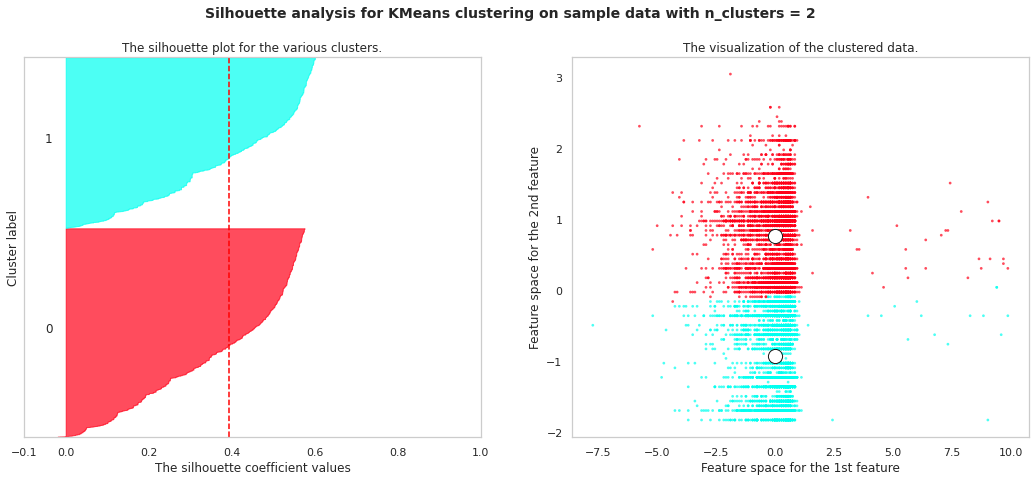

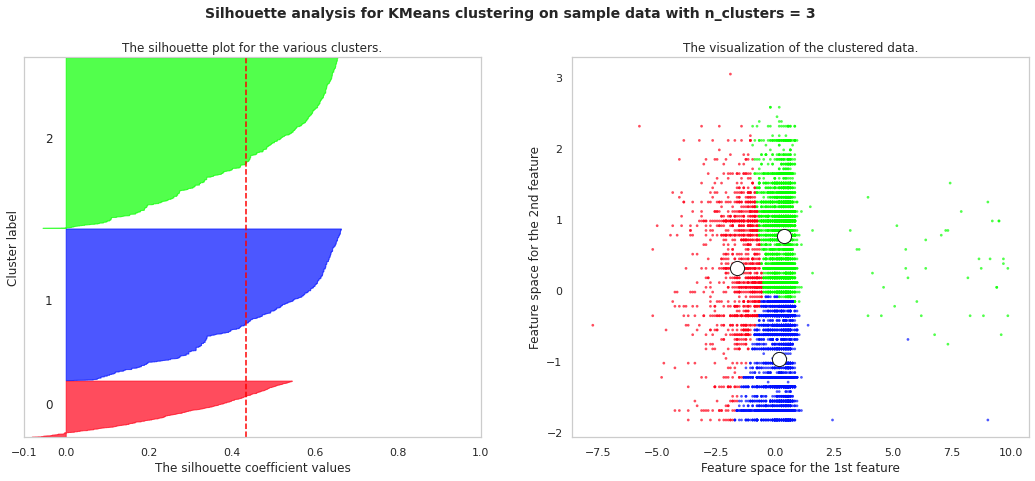

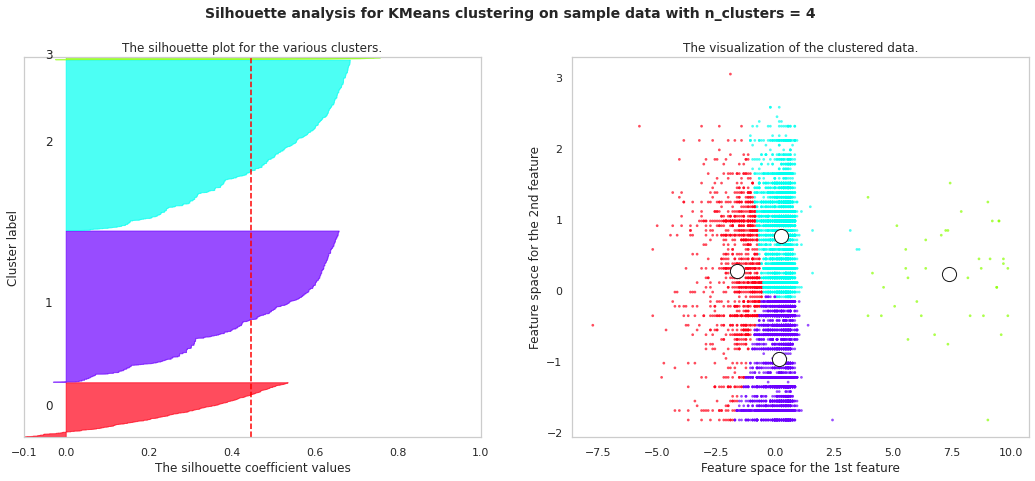

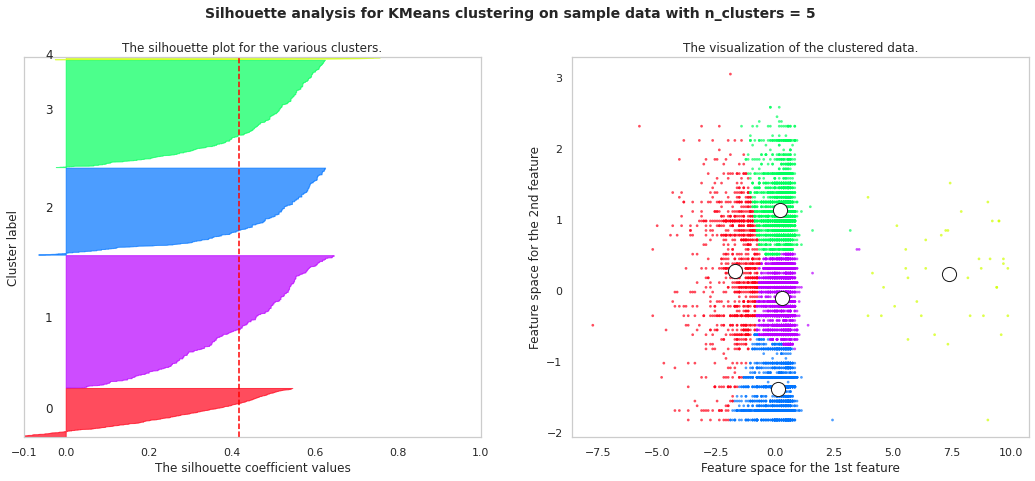

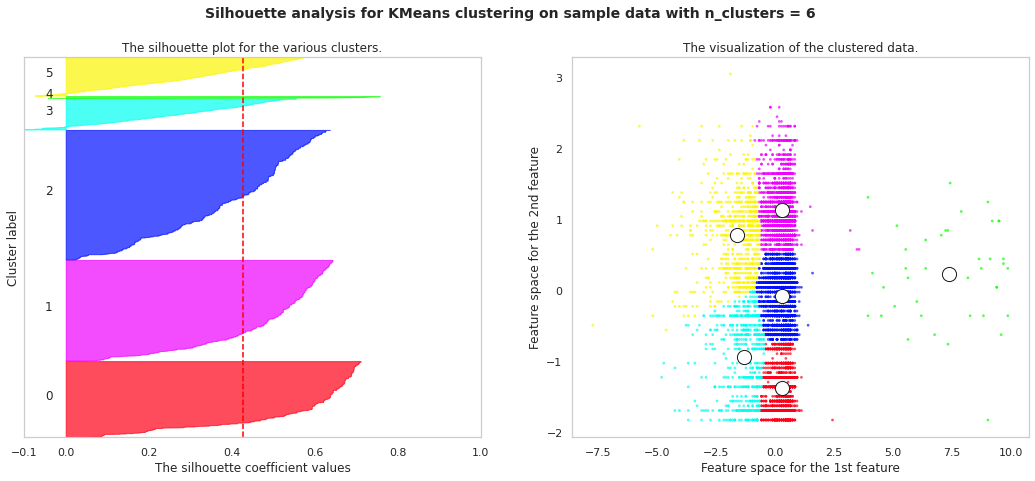

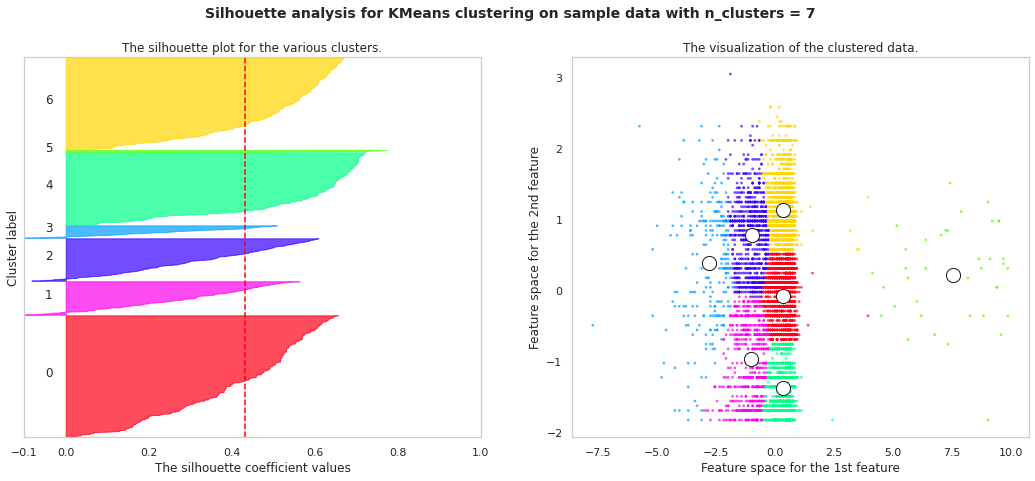

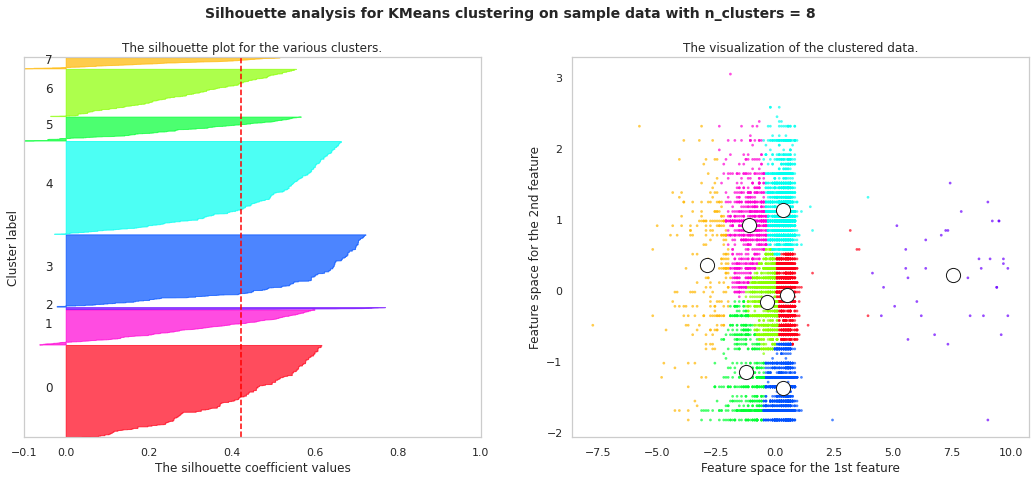

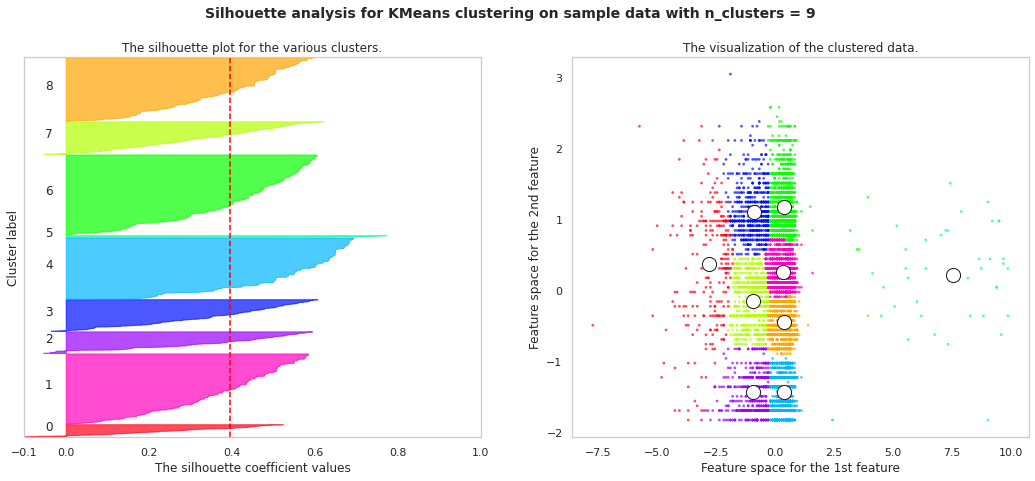

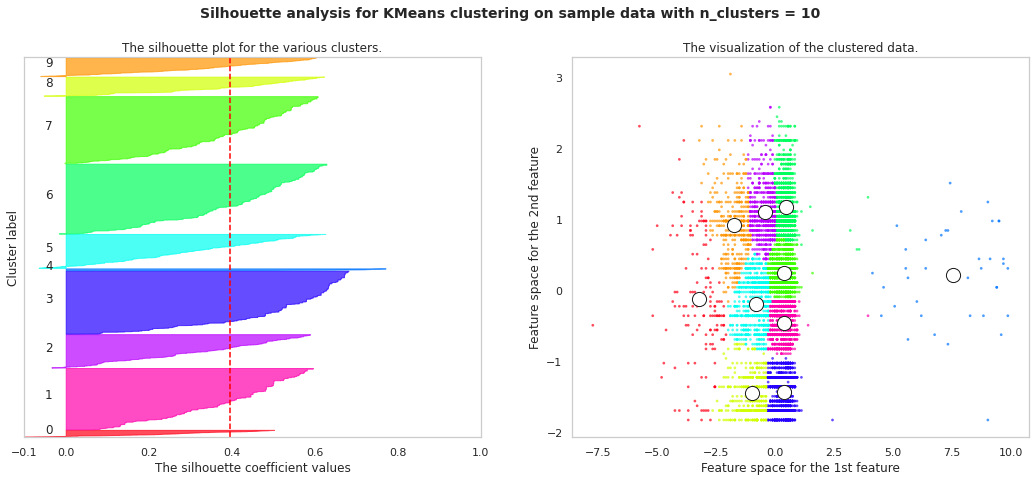

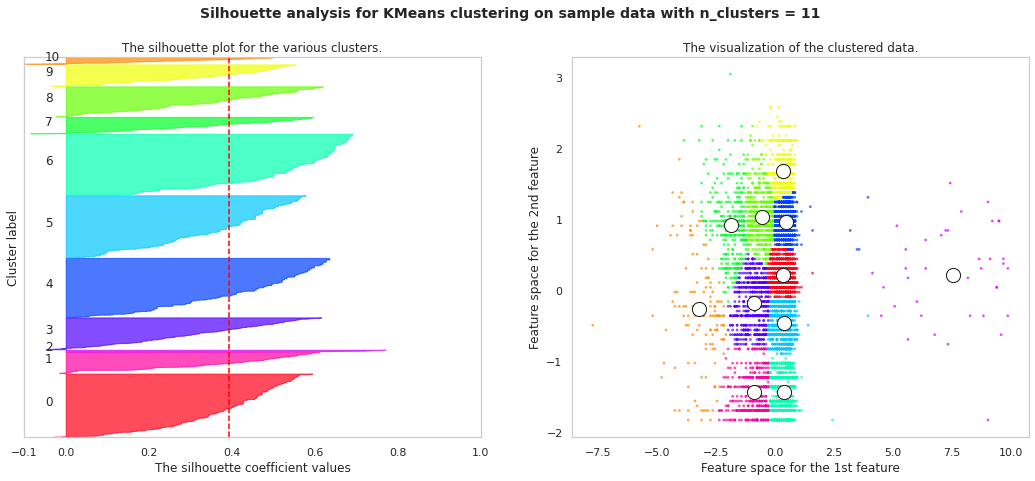

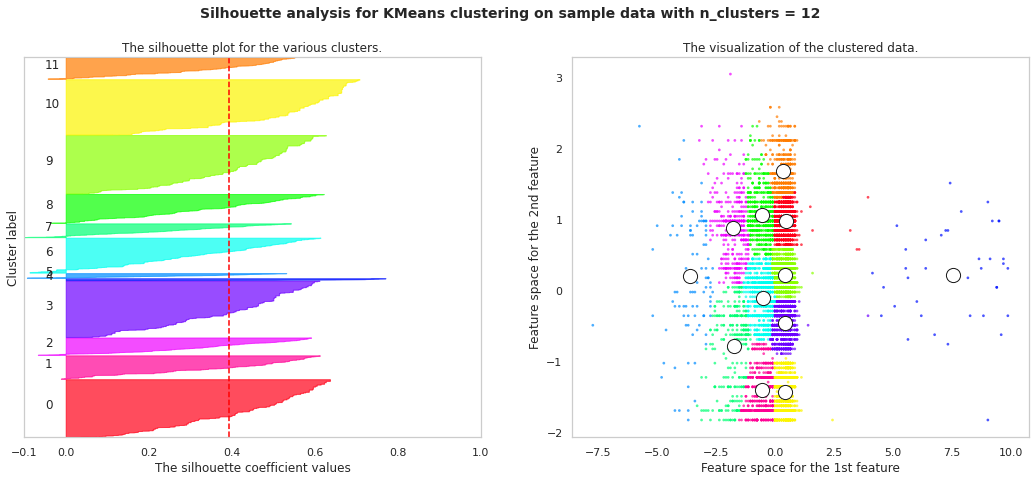

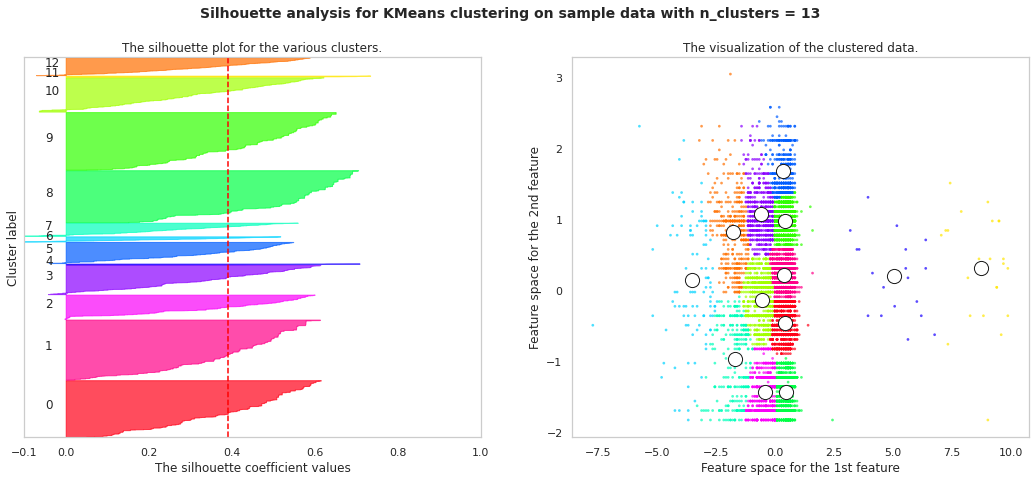

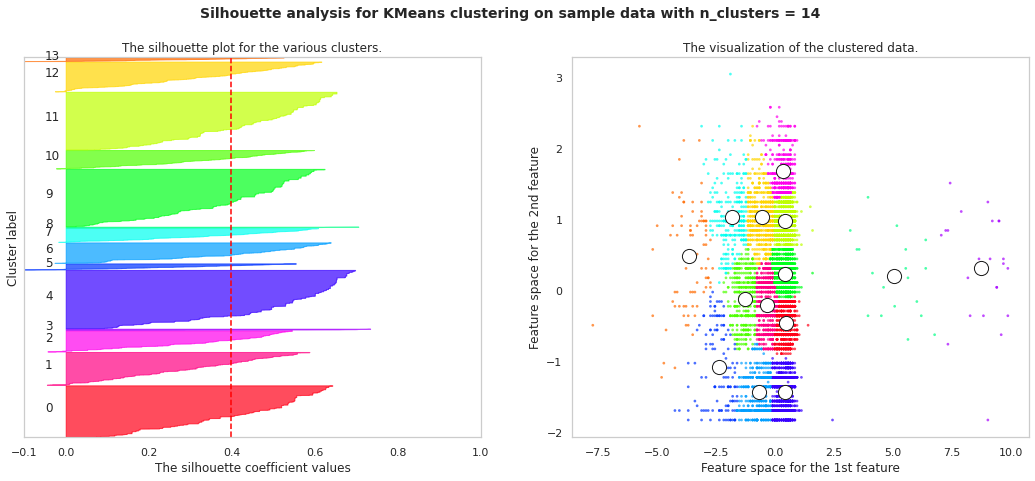

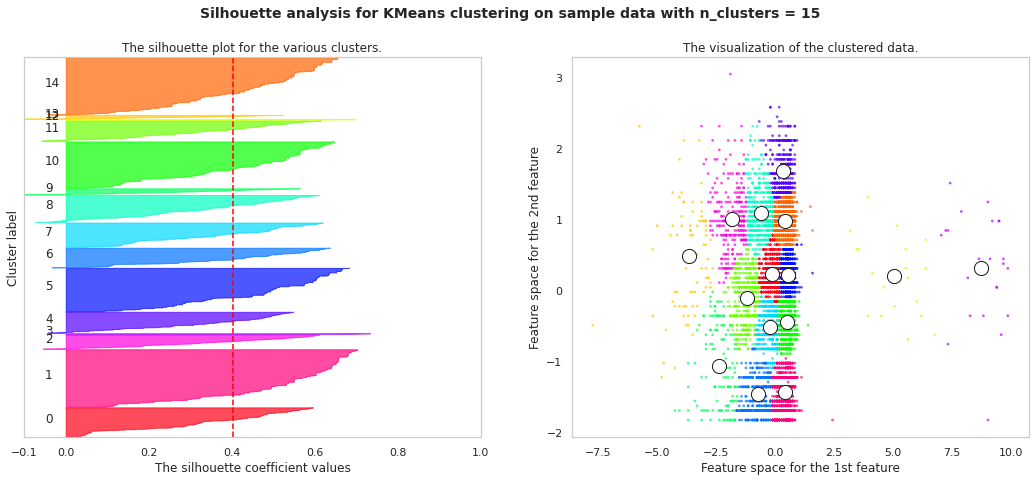

In [ ]:
range_n_clusters = [i for i in range(2,16)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns :

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)


    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]

    ax1.set_xlim([-0.1, 1])

    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.

    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.

    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    

    # Compute the silhouette scores for each sample :

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them :

        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.hsv_r(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle :

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    #ax1.set_facecolor("white")
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.grid(False)

    # The vertical line for average silhouette score of all the values :

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed :

    colors = cm.hsv_r(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters :

    centers = clusterer.cluster_centers_

    # Draw white circles at cluster centers :

    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

  

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    ax2.grid(False)
    #ax2.set_facecolor("white") :
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:

**Mean intra-cluster distance**: Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a.

**Mean nearest cluster distance**: Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

The Silhouette Coefficient for a sample is  S=(b−a)max(a,b) .

Range of Silhouette Coefficient is[-1,1].

Silhouette coefficients near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

**Conclusion:** **From above we can see that at K=4, the model was giving Silhouette score=0.447, which is best among all numbers of cluster**.Further we will try to find optimal number of cluster using Elbow method.

### ML Model - 2 ***Elbow Method***

The elbow method is a technique used in determining the optimal number of clusters in a data set.The elbow curve uses the sum of squared distance (SSE) to choose an ideal value of k based on the distance between the data points and their assigned clusters.

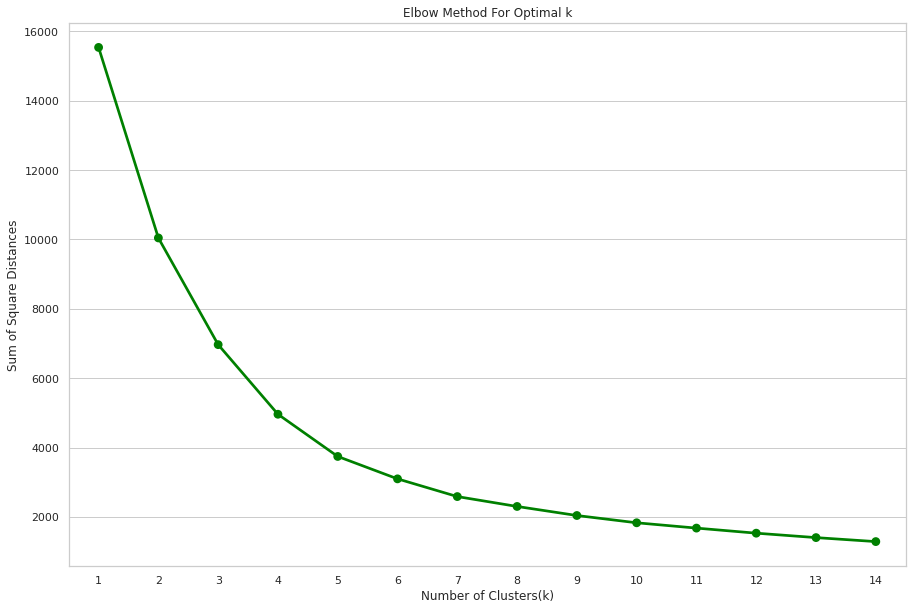

In [ ]:
# ML Model - 2 Implementation
sum_of_square_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_square_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters :

sns.pointplot(x = list(sum_of_square_dist.keys()), y = list(sum_of_square_dist.values()),color="green")
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**From above graph we can see that elbow is forming at k=5 and curve is getting linear, so we will select k=5 as our optimal number of cluster.**

###**Implementing K-means at k=5**

In [ ]:
# ML Model Implementation
kmeans = KMeans(n_clusters = 5 )
# fit the model
kmeans.fit(X)
# predict on the model
y_kmeans= kmeans.predict(X)

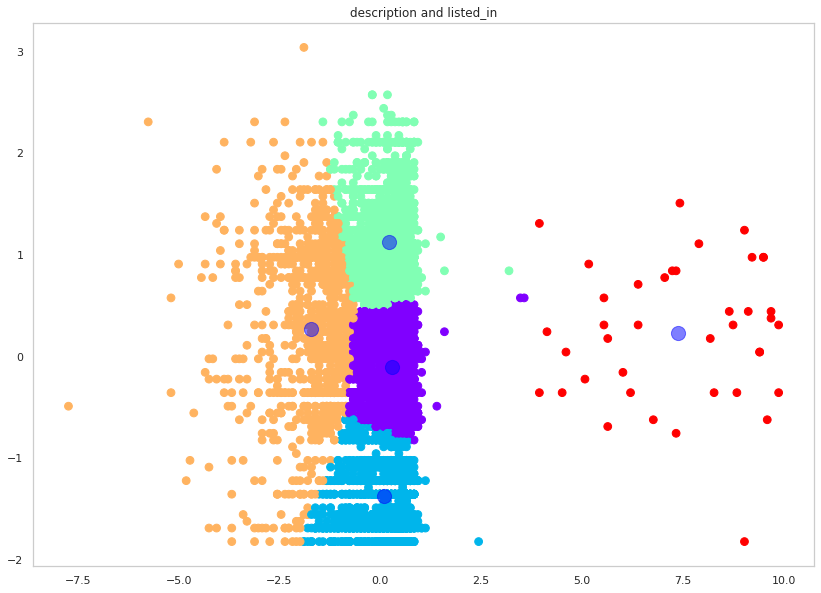

In [ ]:
# Visualizing evaluation Metric Score chart
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(14,10))
plt.title('description and listed_in')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=60, cmap='rainbow')
plt.grid(b=None)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5)
plt.show()

### ML Model - 3 **DBSCAN**

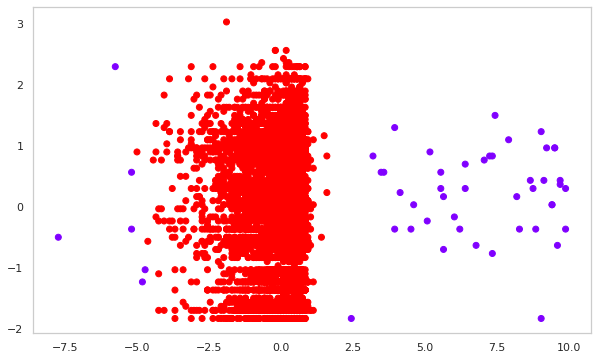

In [ ]:
# ML Model - 3 Implementation
#Importing Libraries
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.9, min_samples=20).fit_predict(X)
plt.figure(figsize=(10,6))
plt.grid(b=None)
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='rainbow')
plt.show()

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is an unsupervised machine learning algorithm used for density-based clustering. It groups together points that are closely packed together (points with many nearby neighbors), and marks points that are alone or in low-density regions as noise. 

**We can say that the Voilet color points are in non denser region and they can be consider as noise, because they dont have any pattern and they weren't accepted by any clusters.**

###ML Model - 4 ***Hierarchical clustering.(Dendogram)***

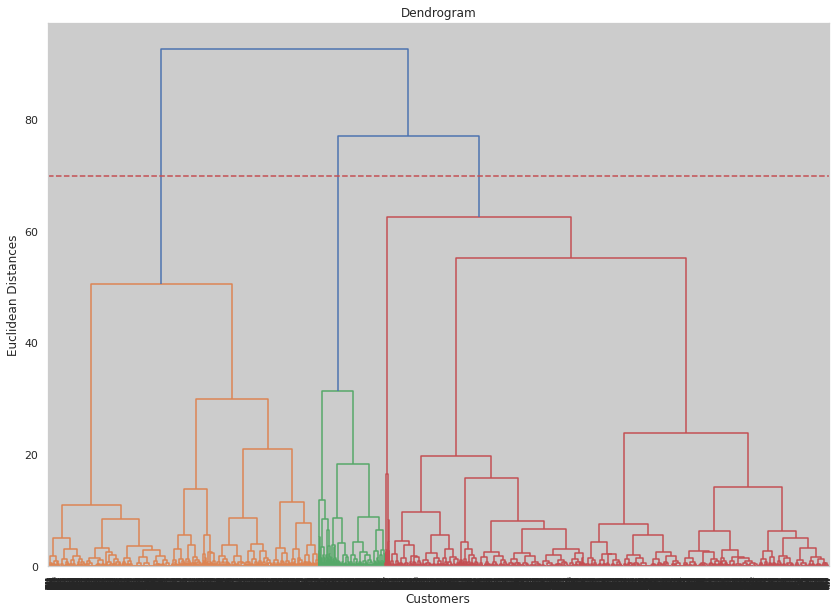

In [ ]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(14,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.axhline(y=70, color='r', linestyle='--')
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

A dendrogram is a tree-like diagram that records the sequences of merges or splits.More the distance of the vertical lines in the dendrogram, more the distance between those clusters.

**Dendogram is showing k=3 as optimal number of clusters.**

###Model-5 **Agglomerative Hierarchical Clustering**

In [ ]:
# Model 5 implementation
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
# predict on the model
y_hc = hc.fit_predict(X)

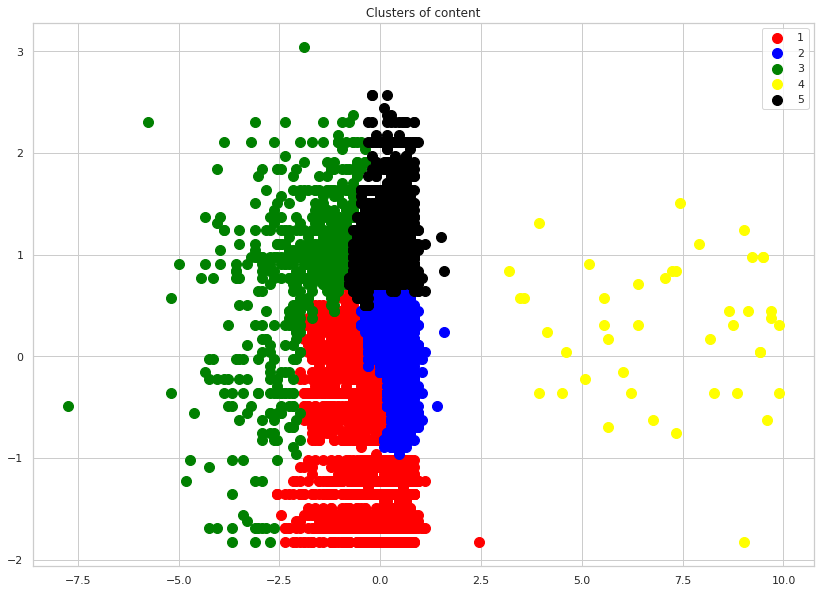

In [ ]:
# Visualizing the clusters :
plt.figure(figsize=(14,10))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = '2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = '3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'yellow', label = '4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'black', label = '5')
plt.title('Clusters of content')
plt.legend()
plt.show()  

The agglomerative hierarchical clustering algorithm is a popular example of HCA. To group the datasets into clusters, it follows the bottom-up approach. It means, this algorithm considers each dataset as a single cluster at the beginning, and then start combining the closest pair of clusters together. It does this until all the clusters are merged into a single cluster that contains all the datasets.

## **Recommendation System**

In [ ]:
pd.DataFrame(tfidf_matrix[0].T.todense(), index=tfidf.get_feature_names(), columns=["tf-idf score"])

,tf-idf score
000,0.0
007,0.0
009,0.0
10,0.0
100,0.0
...,...
ömer,0.0
über,0.0
łukasz,0.0
ōarai,0.0


In [ ]:
#CountVectorizer: Convert a collection of text documents to a matrix of token counts
#TfidfTransformer: Transform a count matrix to a normalized tf or tf-idf representation

from sklearn.pipeline import Pipeline

pipe = Pipeline([('cv', CountVectorizer(stop_words='english')),
                ('tfid', TfidfTransformer())]).fit(df1['description'])

print("CountVectorizer_matrix: {}".format(pipe['cv'].transform(df1['description']).toarray()))
print("CountVectorizer_matrix: {}".format(pipe['tfid'].idf_))
     

CountVectorizer_matrix: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
CountVectorizer_matrix: [6.40280607 8.34871622 9.26500695 ... 9.26500695 9.26500695 9.26500695]


In [ ]:
#The lower the IDF value of a word, the less unique it is to any particular document
pd.DataFrame(pipe['tfid'].idf_, index=pipe['cv'].get_feature_names(), columns=['idf_weights'])
     

,idf_weights
000,6.402806
007,8.348716
009,9.265007
10,6.244582
100,7.250104
...,...
ömer,9.265007
über,8.859542
łukasz,9.265007
ōarai,9.265007


###**Cosine Similarity**

cosine similarity is a measure used to determine the similarity between two items based on their feature vectors. It can be used to recommend items to users that are similar to items they have previously liked or interacted with.

It measures the cosine of the angle between two vectors projected in a multi-dimensional space to find out how similar the documents are irrespective of their size.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix)
programme_list=df1['title'].to_list()

In [ ]:
def recommend(title, cosine_similarity=cosine_sim):
    index = programme_list.index(title)
    sim_score = list(enumerate(cosine_sim[index]))
    sim_score = sorted(sim_score, key= lambda x: x[1], reverse=True)[1:11] #position 0 is the movie itself, thus exclude
    recommend_index = [i[0] for i in sim_score]
    rec_movie = df1['title'].iloc[recommend_index]
    rec_score = [round(i[1],4) for i in sim_score]
    rec_table = pd.DataFrame(list(zip(rec_movie,rec_score)), columns=['Recommend programme','Similarity(0-1)'])
    return rec_table

In [ ]:
#Checking Recommendation  system working correctly or not.
recommend('Avengers: Infinity War')

,Recommend programme,Similarity(0-1)
0,The Talented Mr. Ripley,0.1598
1,The Darkness,0.1371
2,Aliens Ate My Homework,0.1247
3,LEGO Marvel Super Heroes: Black Panther,0.1243
4,Chilling Adventures of Sabrina,0.1194
5,Vroomiz,0.1126
6,Orbiter 9,0.1094
7,Code Lyoko,0.1081
8,Vampires,0.1057
9,LEGO Marvel Super Heroes: Guardians of the Galaxy,0.1047


We can see that algorithm is accuratly recommending movies which is similar to Avengers: Infinity War.

In [ ]:
recommend('3 Idiots')

,Recommend programme,Similarity(0-1)
0,College Romance,0.2317
1,Engineering Girls,0.1727
2,Candy Jar,0.1525
3,Mr. Young,0.1512
4,100 Things to do Before High School,0.1478
5,Pahuna,0.1470
6,Best Neighbors,0.1466
7,Be with Me,0.1364
8,Moms at War,0.1346
9,Lovesong,0.1287


In [ ]:
recommend('Delhi Crime')

,Recommend programme,Similarity(0-1)
0,Roll Red Roll,0.1832
1,Guilty,0.1224
2,The Search,0.1183
3,Loving,0.1092
4,Paharganj,0.1075
5,Citation,0.1059
6,The 10 Sins,0.1058
7,Tig,0.1052
8,One Day: Justice Delivered,0.0946
9,Black Friday,0.0936


We can see that algorith is giving all the recommendation similar to Delhi crime. 

# **Conclusion**


> Our dataset contain 7787 rows and 12 columns.There was'nt any duplicates in dataset,
and maximum number of null value was present in director column followed by cast.

> Most of the content on Netflix is from Movies(~69%) and only 31% tv shows.

> Raul Campos, jan suter was most famous director among all.

> Anupam Kher is most popular actor on Netflix.

> Most of the content released on Netflix by the end of current year and starting of new year.

> International Movies and Dramas are topmost Genres on Netflix.

> Most of the content on Netflix is TV-MA(Mature Audience) rated.

> Unitated states has the highest number of content on the netflix ,followed by India.

> Most of the movies have duration of 90mimutes.

> In title column we got 'Love','Man','World','Story','Life' seems very common word.



> We have implemented 5 clustering model to divide the dataset in clusters.

> K-means clustering shows that '4' will be optimum no of clusters with the silhoutte score of 0.45. But we selected Optimum cluster number as 5 after Elbow curve cross validation.Thus K-means clustering will be best for this data set.


>We have built cosine based  recommender system  using cosine_similarity, which was wroking nicely.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***